In [5]:
#Import the necessary libraries to enable us perform our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
## Read in the data using the appropriate Library and by defining the correct path

df = pd.read_csv('C:/Diabatic_data/extra/decadal_data.csv')
df.columns     ## Check the column headers

Index(['Years', 'WAF_lwrf', 'SAF_lwrd', 'EAF_lwrf', 'NAF_lwrf', 'WAF_swrf',
       'SAF_swrf', 'EAF_swrf', 'NAF_swrf', 'WAF_shtfl', 'SAF_shtfl',
       'EAF_shtfl', 'NAF_shtfl', 'WAF_pr', 'SAF_pr', 'EAF_pr', 'NAF_pr'],
      dtype='object')

In [8]:
# calculating exponential moving average
# using .ewm(span).mean() , with window size = 10
df['SA1_EWMA10'] =df['SAF_pr'].ewm(span=10).mean()
df['SA2_EWMA10'] =df['SAF_shtfl'].ewm(span=10).mean()
df['SA3_EWMA10'] =df['SAF_lwrd'].ewm(span=10).mean()
df['SA4_EWMA10'] =df['SAF_swrf'].ewm(span=10).mean()

# printing Dataframe
#df['NA_EWMA10']

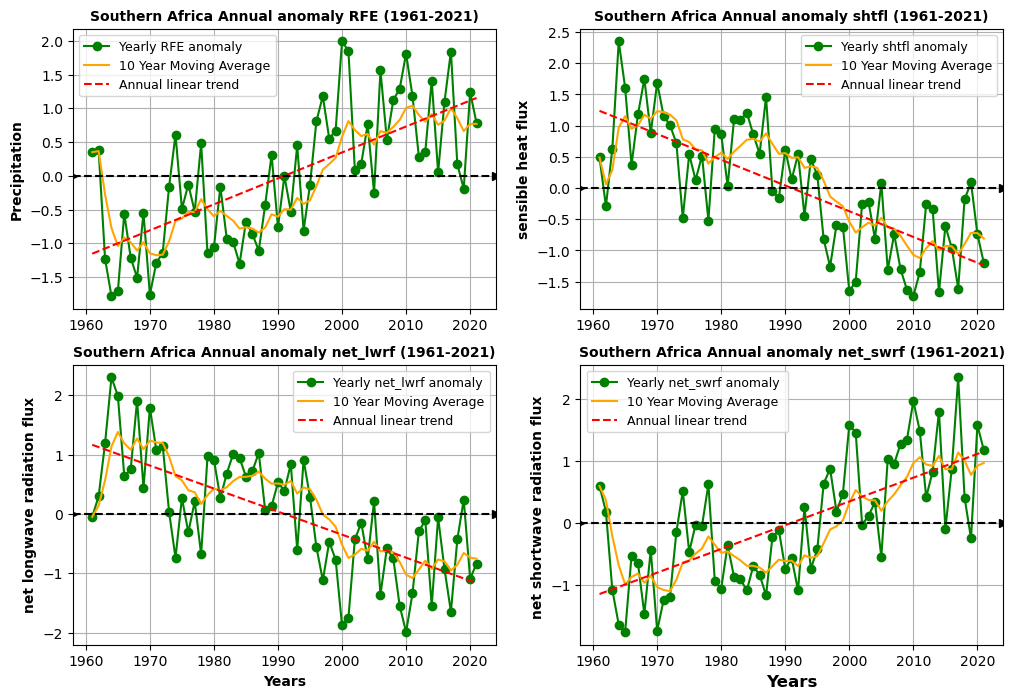

In [9]:
fig, ax = plt.subplots(2,2, figsize =(12,8))

#plot 1
ax[0,0].plot(df['Years'], df['SAF_pr'],color='green', marker='o')
ax[0,0].plot(df['Years'], df['SA1_EWMA10'],color='orange')#, marker='o')
ax[0,0].set_title('Southern Africa Annual anomaly RFE (1961-2021)', fontsize=10, fontweight='bold')
ax[0,0].set_ylabel('Precipitation', fontsize=10, fontweight='bold')
#ax[0,0].set_xlabel('Years', fontsize=10, fontweight='bold')
#ax[0,0].set_yticks(np.arange(0, 22, 2), fontsize=10, fontweight='bold')
z = np.polyfit(df['Years'], df['SAF_pr'], 1)
p = np.poly1d(z)
ax[0,0].plot(df['Years'],p(df['Years']),"r--")
ax[0,0].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[0,0].legend(['Yearly RFE anomaly','10 Year Moving Average',\
                'Annual linear trend'], loc = 'upper left',fontsize=9)
#ax[0,0].text(1986, 5, 'MK trend P value =1.241E-09',fontsize = 12, color ='purple')
#ax[0,0].text(2019, 19, '(a)',fontsize = 14, color ='black', fontweight='bold')
ax[0,0].grid(True)

#plot 2
ax[0,1].plot(df['Years'], df['SAF_shtfl'],color='green', marker='o')
ax[0,1].plot(df['Years'], df['SA2_EWMA10'],color='orange')#, marker='o')
ax[0,1].set_title('Southern Africa Annual anomaly shtfl (1961-2021)', fontsize=10, fontweight='bold')
ax[0,1].set_ylabel('sensible heat flux', fontsize=10, fontweight='bold')
#ax[0,1].set_xlabel('Years', fontsize=10, fontweight='bold')
#ax[0,1].set_yticks(np.arange(0, 22, 2), fontsize=10, fontweight='bold')
z = np.polyfit(df['Years'], df['SAF_shtfl'], 1)
p = np.poly1d(z)
ax[0,1].plot(df['Years'],p(df['Years']),"r--")
ax[0,1].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[0,1].legend(['Yearly shtfl anomaly','10 Year Moving Average',\
                'Annual linear trend'], loc = 'upper right',fontsize=9)
#ax[0,1].text(1986, 0, 'MK trend P value =1.887E-14',fontsize = 12, color ='purple')
#ax[0,1].text(2020, 17, '(b)',fontsize = 14, color ='black',fontweight='bold')
ax[0,1].grid(True)
#plot 3
ax[1,0].plot(df['Years'], df['SAF_lwrd'],color='green', marker='o')
ax[1,0].plot(df['Years'], df['SA3_EWMA10'],color='orange')#, marker='o')
ax[1,0].set_title('Southern Africa Annual anomaly net_lwrf (1961-2021)', fontsize=10, fontweight='bold')
ax[1,0].set_ylabel('net longwave radiation flux', fontsize=10, fontweight='bold')
ax[1,0].set_xlabel('Years', fontsize=10, fontweight='bold')
plt.xlabel('Years', fontsize=12, fontweight='bold')
#ax[1,0].set_yticks(np.arange(0, 22, 2), fontsize=10,fontweight='bold')
z = np.polyfit(df['Years'], df['SAF_lwrd'], 1)
p = np.poly1d(z)
ax[1,0].plot(df['Years'],p(df['Years']),"r--")
ax[1,0].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[1,0].legend(['Yearly net_lwrf anomaly','10 Year Moving Average',\
                'Annual linear trend'], loc = 'upper right',fontsize=9)
#ax[1,0].text(1986, -2, 'MK trend P value =5.888E-12',fontsize = 12, color ='purple')
#ax[1,0].text(2020, 16, '(c)',fontsize = 14, color ='black',fontweight='bold')
ax[1,0].grid(True)

#plot 4
ax[1,1].plot(df['Years'], df['SAF_swrf'],color='green', marker='o' )
ax[1,1].plot(df['Years'], df['SA4_EWMA10'],color='orange')#, marker='o')
ax[1,1].set_title('Southern Africa Annual anomaly net_swrf (1961-2021)', fontsize=10, fontweight='bold')
ax[1,1].set_ylabel('net shortwave radiation flux ', fontsize=10, fontweight='bold')
ax[1,1].set_xlabel('Years', fontsize=12, fontweight='bold')
#ax[1,1].set_yticks(np.arange(0, 20, 2),fontsize=10, fontweight='bold')
z = np.polyfit(df['Years'], df['SAF_swrf'], 1)
p = np.poly1d(z)
ax[1,1].plot(df['Years'],p(df['Years']),"r--")
ax[1,1].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[1,1].legend(['Yearly net_swrf anomaly ','10 Year Moving Average',\
                'Annual linear trend'], loc = 'upper left',fontsize=9)
#ax[1,1].text(1990, 3, 'MK trend P value =0.6038',fontsize = 12, color ='purple')
#ax[1,1].text(2019, 18, '(d)',fontsize = 14, color ='black',fontweight='bold')
#ax[1,1].set_xticks(fontsize=8, fontweight='bold')
ax[1,1].grid(True)
#plt.savefig(home_dir + 'Hot Spell-events_4plots-single consec days.png', dpi=300)
plt.savefig('C:/Diabatic_data/extra/4panel_extra-analysis.png', dpi=300)
plt.show()

### 2 plot 

In [58]:
## Read in the data using the appropriate Library and by defining the correct path

df1 = pd.read_csv('C:/Diabatic_data/extra3/decadal_extra3.csv')
df1.columns     ## Check the column headers

Index(['Years', 'WAF_pr', 'SAF_pr', 'EAF_pr', 'NAF_pr', 'WAF_shf', 'SAF_shf',
       'EAF_shf', 'NAF_shf', 'WAF_lwrf', 'SAF_lwrf', 'EAF_lwrf', 'NAF_lwrf',
       'WAF_swrf', 'SAF_swrf', 'EAF_swrf', 'NAF_swrf'],
      dtype='object')

In [59]:
# calculating exponential moving average
# using .ewm(span).mean() , with window size = 10
df1['NA1_EWMA10'] =df1['NAF_pr'].ewm(span=10).mean()
df1['NA2_EWMA10'] =df1['NAF_shf'].ewm(span=10).mean()
df1['NA3_EWMA10'] =df1['NAF_lwrf'].ewm(span=10).mean()
df1['NA4_EWMA10'] =df1['NAF_swrf'].ewm(span=10).mean()

# printing Dataframe
#df['NA_EWMA10']

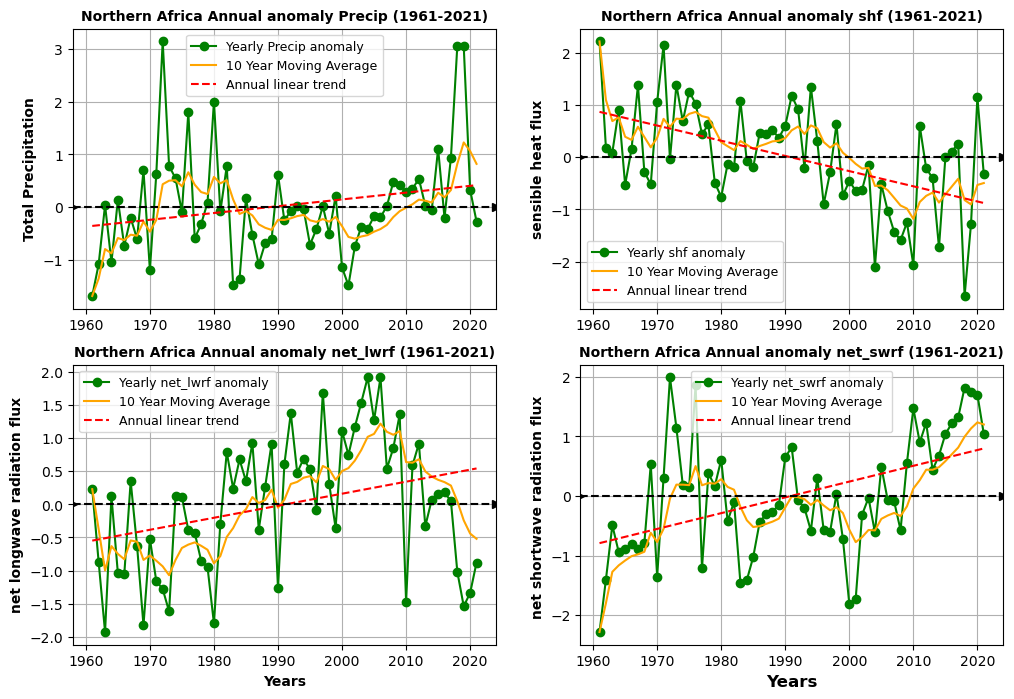

In [60]:
fig, ax = plt.subplots(2,2, figsize =(12,8))

#plot 1
ax[0,0].plot(df1['Years'], df1['NAF_pr'],color='green', marker='o')
ax[0,0].plot(df1['Years'], df1['NA1_EWMA10'],color='orange')#, marker='o')
ax[0,0].set_title('Northern Africa Annual anomaly Precip (1961-2021)', fontsize=10, fontweight='bold')
ax[0,0].set_ylabel('Total Precipitation', fontsize=10, fontweight='bold')
#ax[0,0].set_xlabel('Years', fontsize=10, fontweight='bold')
#ax[0,0].set_yticks(np.arange(0, 22, 2), fontsize=10, fontweight='bold')
z = np.polyfit(df1['Years'], df1['NAF_pr'], 1)
p = np.poly1d(z)
ax[0,0].plot(df1['Years'],p(df1['Years']),"r--")
ax[0,0].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[0,0].legend(['Yearly Precip anomaly','10 Year Moving Average',\
                'Annual linear trend'], loc = 'upper center',fontsize=9)
#ax[0,0].text(1986, 5, 'MK trend P value =1.241E-09',fontsize = 12, color ='purple')
#ax[0,0].text(2019, 19, '(a)',fontsize = 14, color ='black', fontweight='bold')
ax[0,0].grid(True)

#plot 2
ax[0,1].plot(df1['Years'], df1['NAF_shf'],color='green', marker='o')
ax[0,1].plot(df1['Years'], df1['NA2_EWMA10'],color='orange')#, marker='o')
ax[0,1].set_title('Northern Africa Annual anomaly shf (1961-2021)', fontsize=10, fontweight='bold')
ax[0,1].set_ylabel('sensible heat flux', fontsize=10, fontweight='bold')
#ax[0,1].set_xlabel('Years', fontsize=10, fontweight='bold')
#ax[0,1].set_yticks(np.arange(0, 22, 2), fontsize=10, fontweight='bold')
z = np.polyfit(df1['Years'], df1['NAF_shf'], 1)
p = np.poly1d(z)
ax[0,1].plot(df1['Years'],p(df1['Years']),"r--")
ax[0,1].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[0,1].legend(['Yearly shf anomaly','10 Year Moving Average',\
                'Annual linear trend'], loc = 'lower left',fontsize=9)
#ax[0,1].text(1986, 0, 'MK trend P value =1.887E-14',fontsize = 12, color ='purple')
#ax[0,1].text(2020, 17, '(b)',fontsize = 14, color ='black',fontweight='bold')
ax[0,1].grid(True)
#plot 3
ax[1,0].plot(df1['Years'], df1['NAF_lwrf'],color='green', marker='o')
ax[1,0].plot(df1['Years'], df1['NA3_EWMA10'],color='orange')#, marker='o')
ax[1,0].set_title('Northern Africa Annual anomaly net_lwrf (1961-2021)', fontsize=10, fontweight='bold')
ax[1,0].set_ylabel('net longwave radiation flux', fontsize=10, fontweight='bold')
ax[1,0].set_xlabel('Years', fontsize=10, fontweight='bold')
plt.xlabel('Years', fontsize=12, fontweight='bold')
#ax[1,0].set_yticks(np.arange(0, 22, 2), fontsize=10,fontweight='bold')
z = np.polyfit(df1['Years'], df1['NAF_lwrf'], 1)
p = np.poly1d(z)
ax[1,0].plot(df1['Years'],p(df1['Years']),"r--")
ax[1,0].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[1,0].legend(['Yearly net_lwrf anomaly','10 Year Moving Average',\
                'Annual linear trend'], loc = 'upper left',fontsize=9)
#ax[1,0].text(1986, -2, 'MK trend P value =5.888E-12',fontsize = 12, color ='purple')
#ax[1,0].text(2020, 16, '(c)',fontsize = 14, color ='black',fontweight='bold')
ax[1,0].grid(True)

#plot 4
ax[1,1].plot(df1['Years'], df1['NAF_swrf'],color='green', marker='o' )
ax[1,1].plot(df1['Years'], df1['NA4_EWMA10'],color='orange')#, marker='o')
ax[1,1].set_title('Northern Africa Annual anomaly net_swrf (1961-2021)', fontsize=10, fontweight='bold')
ax[1,1].set_ylabel('net shortwave radiation flux ', fontsize=10, fontweight='bold')
ax[1,1].set_xlabel('Years', fontsize=12, fontweight='bold')
#ax[1,1].set_yticks(np.arange(0, 20, 2),fontsize=10, fontweight='bold')
z = np.polyfit(df1['Years'], df1['NAF_swrf'], 1)
p = np.poly1d(z)
ax[1,1].plot(df1['Years'],p(df1['Years']),"r--")
ax[1,1].axhline(y = 0, color = 'black', linestyle = '--', marker='>')
ax[1,1].legend(['Yearly net_swrf anomaly ','10 Year Moving Average',\
                'Annual linear trend'], loc = 'upper center',fontsize=9)
#ax[1,1].text(1990, 3, 'MK trend P value =0.6038',fontsize = 12, color ='purple')
#ax[1,1].text(2019, 18, '(d)',fontsize = 14, color ='black',fontweight='bold')
#ax[1,1].set_xticks(fontsize=8, fontweight='bold')
ax[1,1].grid(True)
#plt.savefig(home_dir + 'Hot Spell-events_4plots-single consec days.png', dpi=300)
plt.savefig('C:/Diabatic_data/extra3/4panel_extra-NAF.png', dpi=300)
plt.show()